In [1]:
!python --version

Python 3.8.5


In [2]:
import numpy as np               # Научные вычисления
import pandas as pd              # Обработка и анализ данных
import matplotlib as mpl         # Визуализация графиков
import matplotlib.pyplot as plt  # MATLAB-подобный способ построения графиков
import seaborn as sns            # Визуализация графиков (надстройка над matplotlib)
import urllib.request            # Работа с URL
import json                      # Кодирование и декодирование данные в удобном формате
import xmltodict                 # Преобразование XML документа в словарь
import requests                  # Отправка HTTP запросов
import os                        # Работа с файловой системой
import matplotlib.image as mpimg # Работа с изображениями

from pandas.api.types import CategoricalDtype # Категориальные данные
from datetime import datetime  # Работа со временем

from matplotlib.legend_handler import HandlerBase # Работа с легендой
from matplotlib.ticker import MaxNLocator # Работа с метками
from matplotlib.text import Text # Работа с текстом на графике
from skimage import transform # Трансформации изображений

In [3]:
pd.set_option('display.max_columns', None) # Максимальное количество отображаемых столбцов
pd.set_option('display.max_rows', None)    # Максимальное количество отображаемых строк

In [4]:
pkgs = {
    'Package': [
        'NumPy', 'Pandas', 'Matplotlib', 'Seaborn', 'Json', 'Xmltodict'],
    'Version': [i.__version__ for i in [np, pd, mpl, sns, json, xmltodict]]}

df_pkgs = pd.DataFrame(data = pkgs)   # Версии используемых библиотек
df_pkgs.head(None).style.hide_index() # Отображение первых N строк или все если указать None

Package,Version
NumPy,1.18.5
Pandas,1.1.3
Matplotlib,3.3.2
Seaborn,0.11.0
Json,2.0.9
Xmltodict,0.12.0


In [5]:
# Путь к товарам
path = 'https://raw.githubusercontent.com/Dankrou/Automated_Data_Processing_and_Control_Systems/master/XML/Dictionary.xml' #таблица использована из своего гитхаб-репозитория

# Считывание каталога товаров
with urllib.request.urlopen(path) as fd:
    catalog = json.loads(json.dumps(xmltodict.parse(fd.read().decode('utf-8'))))

print(catalog)

{'store': {'department': [{'@name_eng': 'Clothing', '@name_rus': 'Одежда', 'product': [{'@id': '1', '@name_eng': 'T-shirts', '@name_rus': 'Футболки'}, {'@id': '2', '@name_eng': 'Jeans', '@name_rus': 'Джинсы'}]}, {'@name_eng': 'Shoes', '@name_rus': 'Обувь', 'product': [{'@id': '101', '@name_eng': 'Sneakers', '@name_rus': 'Кеды'}, {'@id': '102', '@name_eng': 'Womens_shoes', '@name_rus': 'Туфли'}]}, {'@name_eng': 'Hats', '@name_rus': 'Шапки', 'product': [{'@id': '103', '@name_eng': 'Solid hats', '@name_rus': 'Однотонные шапки'}, {'@id': '104', '@name_eng': 'Embroidery Hat', '@name_rus': 'Шапки с вышивкой'}]}, {'@name_eng': 'Gloves', '@name_rus': 'Перчатки', 'product': [{'@id': '105', '@name_eng': 'Knitted gloves', '@name_rus': 'Трикотажные перчатки'}, {'@id': '106', '@name_eng': 'Zip Lock Gloves', '@name_rus': 'Перчатки с замком-молнией'}]}, {'@name_eng': 'Accessories', '@name_rus': 'Аксессуары', 'product': [{'@id': '107', '@name_eng': 'Bracelets', '@name_rus': 'Браслеты'}, {'@id': '108',

In [6]:
catalog['store']['department']

[{'@name_eng': 'Clothing',
  '@name_rus': 'Одежда',
  'product': [{'@id': '1', '@name_eng': 'T-shirts', '@name_rus': 'Футболки'},
   {'@id': '2', '@name_eng': 'Jeans', '@name_rus': 'Джинсы'}]},
 {'@name_eng': 'Shoes',
  '@name_rus': 'Обувь',
  'product': [{'@id': '101', '@name_eng': 'Sneakers', '@name_rus': 'Кеды'},
   {'@id': '102', '@name_eng': 'Womens_shoes', '@name_rus': 'Туфли'}]},
 {'@name_eng': 'Hats',
  '@name_rus': 'Шапки',
  'product': [{'@id': '103',
    '@name_eng': 'Solid hats',
    '@name_rus': 'Однотонные шапки'},
   {'@id': '104',
    '@name_eng': 'Embroidery Hat',
    '@name_rus': 'Шапки с вышивкой'}]},
 {'@name_eng': 'Gloves',
  '@name_rus': 'Перчатки',
  'product': [{'@id': '105',
    '@name_eng': 'Knitted gloves',
    '@name_rus': 'Трикотажные перчатки'},
   {'@id': '106',
    '@name_eng': 'Zip Lock Gloves',
    '@name_rus': 'Перчатки с замком-молнией'}]},
 {'@name_eng': 'Accessories',
  '@name_rus': 'Аксессуары',
  'product': [{'@id': '107',
    '@name_eng': 'Brace

In [7]:
# Табличное представление
catalog = pd.DataFrame.from_dict(catalog['store']['department'])

catalog

,@name_eng,@name_rus,product
0,Clothing,Одежда,"[{'@id': '1', '@name_eng': 'T-shirts', '@name_..."
1,Shoes,Обувь,"[{'@id': '101', '@name_eng': 'Sneakers', '@nam..."
2,Hats,Шапки,"[{'@id': '103', '@name_eng': 'Solid hats', '@n..."
3,Gloves,Перчатки,"[{'@id': '105', '@name_eng': 'Knitted gloves',..."
4,Accessories,Аксессуары,"[{'@id': '107', '@name_eng': 'Bracelets', '@na..."
5,Handbags,Сумки,"[{'@id': '109', '@name_eng': 'Textile bags', '..."
6,Sportswear,Спортивная одежда,"[{'@id': '111', '@name_eng': 'Sweatpants', '@n..."
7,Socks,Носки,"[{'@id': '113', '@name_eng': 'Knitted Socks', ..."
8,Costumes,Костюмы,"[{'@id': '115', '@name_eng': 'Blazers', '@name..."
9,Shirts,Рубашки,"[{'@id': '117', '@name_eng': 'Flannel Shirts',..."


In [8]:
# Парсинг товаров
for e in ['@id', '@name_eng', '@name_rus']:
    catalog['product_' + e[1:]] = catalog['product'].apply(lambda x: x[e] if type(x) is dict else [v[e] for v in x])

catalog

,@name_eng,@name_rus,product,product_id,product_name_eng,product_name_rus
0,Clothing,Одежда,"[{'@id': '1', '@name_eng': 'T-shirts', '@name_...","[1, 2]","[T-shirts, Jeans]","[Футболки, Джинсы]"
1,Shoes,Обувь,"[{'@id': '101', '@name_eng': 'Sneakers', '@nam...","[101, 102]","[Sneakers, Womens_shoes]","[Кеды, Туфли]"
2,Hats,Шапки,"[{'@id': '103', '@name_eng': 'Solid hats', '@n...","[103, 104]","[Solid hats, Embroidery Hat]","[Однотонные шапки, Шапки с вышивкой]"
3,Gloves,Перчатки,"[{'@id': '105', '@name_eng': 'Knitted gloves',...","[105, 106]","[Knitted gloves, Zip Lock Gloves]","[Трикотажные перчатки, Перчатки с замком-молнией]"
4,Accessories,Аксессуары,"[{'@id': '107', '@name_eng': 'Bracelets', '@na...","[107, 108]","[Bracelets, Chains]","[Браслеты, Цепочки]"
5,Handbags,Сумки,"[{'@id': '109', '@name_eng': 'Textile bags', '...","[109, 110]","[Textile bags, Shoulder bags]","[Текстильные сумки, Сумки на плечо]"
6,Sportswear,Спортивная одежда,"[{'@id': '111', '@name_eng': 'Sweatpants', '@n...","[111, 112]","[Sweatpants, Sport jackets]","[Спортивные брюки, Спортивные куртки]"
7,Socks,Носки,"[{'@id': '113', '@name_eng': 'Knitted Socks', ...","[113, 114]","[Knitted Socks, Jacquard socks]","[Вязаные носки, Жаккардовые носки]"
8,Costumes,Костюмы,"[{'@id': '115', '@name_eng': 'Blazers', '@name...","[115, 116]","[Blazers, Pants]","[Пиджаки, Брюки]"
9,Shirts,Рубашки,"[{'@id': '117', '@name_eng': 'Flannel Shirts',...","[117, 118]","[Flannel Shirts, Jacket-shirts]","[Фланелевые рубашки, Куртки-рубашки]"


In [9]:
# Удаление не нужного столбца, которого распарсили
catalog.drop(['product'], axis = 1, inplace = True)

catalog

,@name_eng,@name_rus,product_id,product_name_eng,product_name_rus
0,Clothing,Одежда,"[1, 2]","[T-shirts, Jeans]","[Футболки, Джинсы]"
1,Shoes,Обувь,"[101, 102]","[Sneakers, Womens_shoes]","[Кеды, Туфли]"
2,Hats,Шапки,"[103, 104]","[Solid hats, Embroidery Hat]","[Однотонные шапки, Шапки с вышивкой]"
3,Gloves,Перчатки,"[105, 106]","[Knitted gloves, Zip Lock Gloves]","[Трикотажные перчатки, Перчатки с замком-молнией]"
4,Accessories,Аксессуары,"[107, 108]","[Bracelets, Chains]","[Браслеты, Цепочки]"
5,Handbags,Сумки,"[109, 110]","[Textile bags, Shoulder bags]","[Текстильные сумки, Сумки на плечо]"
6,Sportswear,Спортивная одежда,"[111, 112]","[Sweatpants, Sport jackets]","[Спортивные брюки, Спортивные куртки]"
7,Socks,Носки,"[113, 114]","[Knitted Socks, Jacquard socks]","[Вязаные носки, Жаккардовые носки]"
8,Costumes,Костюмы,"[115, 116]","[Blazers, Pants]","[Пиджаки, Брюки]"
9,Shirts,Рубашки,"[117, 118]","[Flannel Shirts, Jacket-shirts]","[Фланелевые рубашки, Куртки-рубашки]"


In [10]:
# Преобразование списков в строки
catalog = catalog.set_index(['@name_eng', '@name_rus']).apply(lambda x: x.apply(pd.Series).stack()).reset_index().drop('level_2', 1)

catalog

,@name_eng,@name_rus,product_id,product_name_eng,product_name_rus
0,Clothing,Одежда,1,T-shirts,Футболки
1,Clothing,Одежда,2,Jeans,Джинсы
2,Shoes,Обувь,101,Sneakers,Кеды
3,Shoes,Обувь,102,Womens_shoes,Туфли
4,Hats,Шапки,103,Solid hats,Однотонные шапки
5,Hats,Шапки,104,Embroidery Hat,Шапки с вышивкой
6,Gloves,Перчатки,105,Knitted gloves,Трикотажные перчатки
7,Gloves,Перчатки,106,Zip Lock Gloves,Перчатки с замком-молнией
8,Accessories,Аксессуары,107,Bracelets,Браслеты
9,Accessories,Аксессуары,108,Chains,Цепочки


In [11]:
# Переименование названий столбцов
catalog.rename(
    columns = {
        '@name_eng': 'Department_eng',
        '@name_rus': 'Department_rus',
        'product_id': 'ID_product',
        'product_name_eng': 'Product_eng',
        'product_name_rus': 'Product_rus'
    },
    inplace = True
)

catalog

,Department_eng,Department_rus,ID_product,Product_eng,Product_rus
0,Clothing,Одежда,1,T-shirts,Футболки
1,Clothing,Одежда,2,Jeans,Джинсы
2,Shoes,Обувь,101,Sneakers,Кеды
3,Shoes,Обувь,102,Womens_shoes,Туфли
4,Hats,Шапки,103,Solid hats,Однотонные шапки
5,Hats,Шапки,104,Embroidery Hat,Шапки с вышивкой
6,Gloves,Перчатки,105,Knitted gloves,Трикотажные перчатки
7,Gloves,Перчатки,106,Zip Lock Gloves,Перчатки с замком-молнией
8,Accessories,Аксессуары,107,Bracelets,Браслеты
9,Accessories,Аксессуары,108,Chains,Цепочки


In [12]:
# Добавление ID каждой категории
catalog['ID_department'] = catalog['Department_eng'].astype('category').cat.codes + 1

catalog

,Department_eng,Department_rus,ID_product,Product_eng,Product_rus,ID_department
0,Clothing,Одежда,1,T-shirts,Футболки,2
1,Clothing,Одежда,2,Jeans,Джинсы,2
2,Shoes,Обувь,101,Sneakers,Кеды,8
3,Shoes,Обувь,102,Womens_shoes,Туфли,8
4,Hats,Шапки,103,Solid hats,Однотонные шапки,6
5,Hats,Шапки,104,Embroidery Hat,Шапки с вышивкой,6
6,Gloves,Перчатки,105,Knitted gloves,Трикотажные перчатки,4
7,Gloves,Перчатки,106,Zip Lock Gloves,Перчатки с замком-молнией,4
8,Accessories,Аксессуары,107,Bracelets,Браслеты,1
9,Accessories,Аксессуары,108,Chains,Цепочки,1


In [13]:
# Сортировка столбцов
capitalizу = ['ID_department', 'Department_eng', 'Department_rus', 'ID_product', 'Product_eng', 'Product_rus']

catalog = catalog[capitalizу] # Изменение позиции столбцов

catalog

,ID_department,Department_eng,Department_rus,ID_product,Product_eng,Product_rus
0,2,Clothing,Одежда,1,T-shirts,Футболки
1,2,Clothing,Одежда,2,Jeans,Джинсы
2,8,Shoes,Обувь,101,Sneakers,Кеды
3,8,Shoes,Обувь,102,Womens_shoes,Туфли
4,6,Hats,Шапки,103,Solid hats,Однотонные шапки
5,6,Hats,Шапки,104,Embroidery Hat,Шапки с вышивкой
6,4,Gloves,Перчатки,105,Knitted gloves,Трикотажные перчатки
7,4,Gloves,Перчатки,106,Zip Lock Gloves,Перчатки с замком-молнией
8,1,Accessories,Аксессуары,107,Bracelets,Браслеты
9,1,Accessories,Аксессуары,108,Chains,Цепочки


In [14]:
#. Установка индексов
catalog.set_index('ID_product', inplace = True)
catalog.index = catalog.index.map(str)

catalog.head(20)

,ID_department,Department_eng,Department_rus,Product_eng,Product_rus
ID_product,,,,,
1,2,Clothing,Одежда,T-shirts,Футболки
2,2,Clothing,Одежда,Jeans,Джинсы
101,8,Shoes,Обувь,Sneakers,Кеды
102,8,Shoes,Обувь,Womens_shoes,Туфли
103,6,Hats,Шапки,Solid hats,Однотонные шапки
104,6,Hats,Шапки,Embroidery Hat,Шапки с вышивкой
105,4,Gloves,Перчатки,Knitted gloves,Трикотажные перчатки
106,4,Gloves,Перчатки,Zip Lock Gloves,Перчатки с замком-молнией
107,1,Accessories,Аксессуары,Bracelets,Браслеты


In [15]:
catalog.to_csv(
    r'../lr2/CSV/New.csv', index = True, header = True
)

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


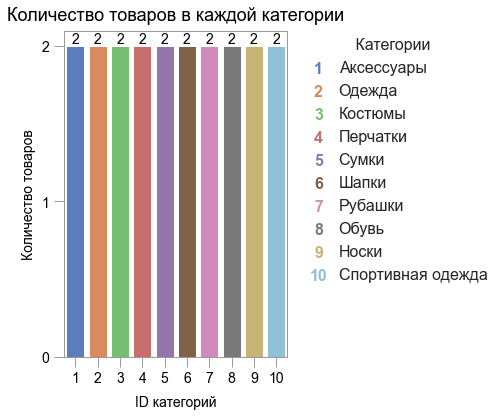

In [16]:
# Базовый класс легенды
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup, xdescent, ydescent, width, height, fontsize, trans):
        tx = Text(
            width / 1.3,
            height / 4,
            tup[0],
            fontsize = fontsize,
            ha = 'center',
            va = 'center',
            color = tup[1],
            fontweight = 'bold'
        )
        
        return [tx]

def _countplot(df, pad):
    """
    График подсчета количества элементов

    (pandas.core.frame.DataFrame, int) -> None

    Аргументы:
        df - Данные
        pad - Отступ от ряда до его значения

    Возвращает: None
    """

    # Создание новой фигуры
    plt.figure(
        figsize = (4, 6) # Размер фигуры в дюймах
    )
    
    # Установка эстетических параметров
    sns.set(
        style = 'white', # Стиль
        palette = 'muted', # Пальтра
        color_codes = True,
        rc = {'lines.linewidth': 2.7}
    )
    sns.despine(left = True)
    mpl.rcParams['axes.linewidth'] = 1 # Толщина рамки

    ax = plt.axes() # Добавление осей к текущей фигуре
    ax.xaxis.tick_bottom() # Перемещение меток в нижнюю часть

    # Количество элементов в каждом классе
    ax = sns.countplot(df.ID_department, label = 'Количество')
    
    counts = df.groupby(df.ID_department).Department_eng.count().index.tolist()

    for i, p in enumerate(ax.patches):
        height = p.get_height()

        ax.text(
            p.get_x() + p.get_width() / 2.0, # X позиция размещения текста
            height + pad, # Y позиция размещения текста
            df.ID_department.value_counts()[counts[i]], # Текст
            ha = 'center', # Выравнивание
            fontdict = {
                'fontsize': 14, # Размер заголовка
                'color': '#000000' # Цвет заголовка
            },
        )

    # Изменение внешнего вида меток
    ax.tick_params(
        axis = 'x', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#999A99', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        bottom = True,  # Рисование линий меток
    )
    ax.tick_params(
        axis = 'y', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#999A99', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        left = True  # Рисование линий меток
    )

    # Заголовок осей
    ax.set_title(
        label = 'Количество товаров в каждой категории', # Заголовок
        fontdict = {
            'fontsize': 18, # Размер заголовка
            'color': '#000000' # Цвет заголовка
        },
        pad = 10 # Отступ заголовка от вершины осей
    )

    # Изменение внешнего вида меток данных
    ax.set_xlabel(
        'ID категорий',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 10 # Отступ

    )
    ax.set_ylabel(
        'Количество товаров',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 5 # Отступ
    )
    
    plt.setp(ax.spines.values(), color = '#999A99') # Цвет рамки
    
    ax.yaxis.set_major_locator(MaxNLocator(integer = True))

    xticklabels = ax.get_xticklabels() # Метки X
    
    # Словарь из ID и названий категорий
    labels = dict(zip(df.ID_department, df.Department_rus))
    
    labels = [labels[int(h.get_text())]  for h in xticklabels]
    handles = [(h.get_text(), c.get_fc()) for h, c in zip(xticklabels, ax.patches)]
    
    ax.legend(
        handles,
        labels,
        handler_map = {tuple : TextHandler()},
        bbox_to_anchor = (1., 1),
        borderaxespad = 0,
        frameon = False,
        fontsize = 16,
        title = ' Категории',
        title_fontsize = 16
    )
    
    plt.show() # Отображение фигуры

_countplot(catalog, 0.015)

In [17]:
# Типы изображений
image_types = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')


def list_images(basePath, contains = None):
    return list_files(basePath, validExts = image_types, contains = contains)


def list_files(basePath, validExts = None, contains = None):
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        for filename in filenames:
            if contains is not None and filename.find(contains) == -1:
                continue

            ext = filename[filename.rfind('.'):].lower()

            if validExts is None or ext.endswith(validExts):
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

In [18]:
urls = '../lr2/URL/Blazers.txt'
dir_output = '../lr2/Store/Blazers'

def download(urls, dir_output):
    # ------------------------------------------------------------------------------------------------------------------

    green = '\033[92m'  # Зеленый
    red = '\033[91m'  # Красный
    bold = '\033[1m'  # Жирный
    end = '\033[0m'  # Выход

    format_time = '%Y-%m-%d %H:%M:%S'  # Формат времени

    # ------------------------------------------------------------------------------------------------------------------

    # Файл не найден
    if os.path.isfile(urls) is False:
        print('[{}{}{}] Файл "{}" не найден ...'.format(
            red, datetime.now().strftime(format_time), end, os.path.basename(urls)
        ))
        return False

    _, ext = os.path.splitext(urls)  # Расширение файла

    if ext.replace('.', '') != 'txt':
        print('[{}{}{}] Расширение файла должно быть "{}" ...'.format(
            red, datetime.now().strftime(format_time), end, 'txt'
        ))
        return False

    if os.stat(urls).st_size == 0:
        print('[{}{}{}] Файл "{}" пуст ...'.format(
            red, datetime.now().strftime(format_time), end, os.path.basename(urls)
        ))
        return False

    # Создание директории, куда будут сохранены изображения, если она не существует
    if not os.path.exists(dir_output):
        os.makedirs(dir_output)

    # ------------------------------------------------------------------------------------------------------------------

    # Список URL-адресов из входного текстового файла
    urls = open(urls).read().strip().split('\n')

    # Проход по всем url
    for i, url in enumerate(urls):
        i += 1

        try:
            req = requests.get(url, timeout = 10)  # Отправка запроса GET

            # Сохранение изображения в указанную директорию
            path = os.path.sep.join([dir_output, '{}.jpg'.format(str(i).zfill(8))])

            with open(path, 'wb') as file:
                file.write(req.content)
        except:
            pass

    # ------------------------------------------------------------------------------------------------------------------

    all_download_files = 0  # Общее количество загруженных изображений

    # Проверка скачанных файлов
    for imagePath in list_images(dir_output):
        delete = False  # По умолчанию файл не должен быть удален

        try:
            image = mpl.pyplot.imread(imagePath)  # Попытка чтения изображения

            # Удаление файла если он не прочитан
            if image is None:
                delete = True
            else:
                all_download_files += 1
        except:
            delete = True

        # Удаление файла
        if delete:
            print('[{}{}{}] Ошибка при чтении "{}" ... удаление ...'.format(
                red, datetime.now().strftime(format_time), end, os.path.basename(imagePath)
            ))
            os.remove(imagePath)

    print('[{}{}{}] Всего файлов загружено: {}{}{} ...'.format(
        green, datetime.now().strftime(format_time), end, bold, all_download_files, end
    ))

In [19]:
res = download(urls, dir_output)

[2020-12-08 13:39:03] Всего файлов загружено: 10 ...


In [20]:
base_dir = '../lr2/Store/' # Директория с БД

department = ['Blazers', 'Bracelets', 'Chains', 'Embroidery_Hat', 'Flannel_Shirts', 'Jacket-shirts', 'Jacquard_socks', 'Jeans', 'Knitted_gloves', 'Knitted_Socks', 'Pants', 'Shoulder_bags', 'Sneakers', 'Solid_hats', 'Sport_jackets', 'Sweatpants', 'Textile_bags', 'T-shirts', 'Womens_Shoes', 'Zip_Lock_Gloves'] # Названия категорий

In [21]:
list_of_files = {} # Словарь для DataFrame

# Проход по всем категориям
for curr in department:
    # Формирование словаря для DataFrame
    list_of_files[curr] = os.listdir(os.path.join(base_dir, curr))

# Отображение в DataFrame
df_files = pd.DataFrame.from_dict(data = list_of_files, orient = 'index').transpose()
df_files[:10].head(None) # Отображение первых N строк или все если указать None

,Blazers,Bracelets,Chains,Embroidery_Hat,Flannel_Shirts,Jacket-shirts,Jacquard_socks,Jeans,Knitted_gloves,Knitted_Socks,Pants,Shoulder_bags,Sneakers,Solid_hats,Sport_jackets,Sweatpants,Textile_bags,T-shirts,Womens_Shoes,Zip_Lock_Gloves
0,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg,00000001.jpg
1,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg,00000002.jpg
2,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg,00000003.jpg
3,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg,00000004.jpg
4,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg,00000005.jpg
5,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg,00000006.jpg
6,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg,00000007.jpg
7,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg,00000008.jpg
8,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg,00000009.jpg
9,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg,00000010.jpg


In [22]:
dict_dep = {'Blazers':0, 'Bracelets':1, 'Chains':2, 'Embroidery_Hat':3, 'Flannel_Shirts':4, 'Jacket-shirts':5, 'Jacquard_socks':6, 'Jeans':7, 'Knitted_gloves':8, 'Knitted_Socks':9, 'Pants':10, 'Shoulder_bags':11, 'Sneakers':12, 'Solid_hats':13, 'Sport_jackets':14, 'Sweatpants':15, 'Textile_bags':16, 'T-shirts':17, 'Womens_Shoes':18, 'Zip_Lock_Gloves':19}

dict_dep = pd.DataFrame.from_dict(dict_dep, orient = 'index', columns = ['ID'])
dict_dep.head(None) # Отображение первых N строк или все если указать None

,ID
Blazers,0
Bracelets,1
Chains,2
Embroidery_Hat,3
Flannel_Shirts,4
Jacket-shirts,5
Jacquard_socks,6
Jeans,7
Knitted_gloves,8
Knitted_Socks,9


D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


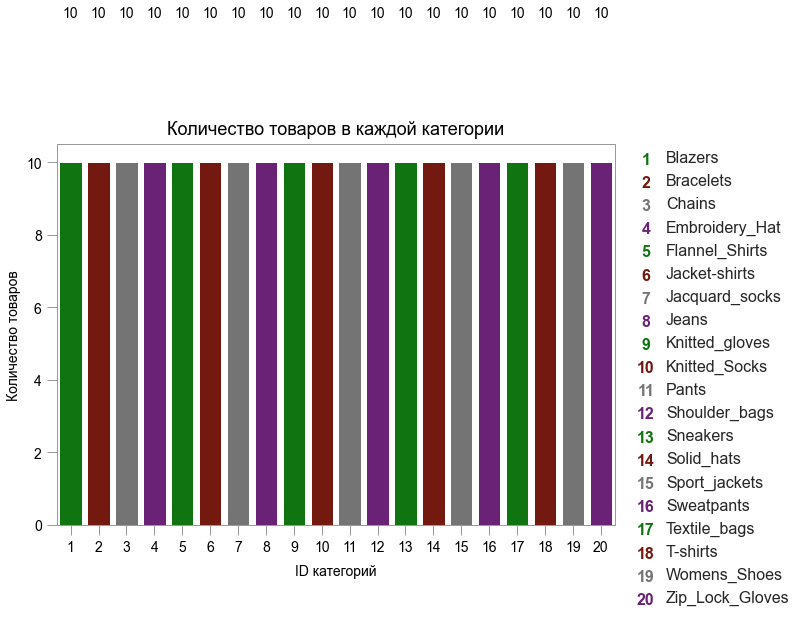

In [23]:
# Базовый класс легенды
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup, xdescent, ydescent, width, height, fontsize, trans):
        tx = Text(
            width / 1.3,
            height / 4,
            tup[0],
            fontsize = fontsize,
            ha = 'center',
            va = 'center',
            color = tup[1],
            fontweight = 'bold'
        )
        
        return [tx]

def _countplot(df, pad):
    """
    График подсчета количества элементов

    (pandas.core.frame.DataFrame, int) -> None

    Аргументы:
        df - Данные
        pad - Отступ от ряда до его значения

    Возвращает: None
    """

    # Создание новой фигуры
    plt.figure(
        figsize = (10, 7) # Размер фигуры в дюймах
    )

    # Установка эстетических параметров
    sns.set(
        style = 'white', # Стиль
        palette = 'muted', # Пальтра
        color_codes = True,
        rc = {'lines.linewidth': 2.7}
    )
    sns.despine(left = True)
    mpl.rcParams['axes.linewidth'] = 1 # Толщина рамки
    
    ax = plt.axes() # Добавление осей к текущей фигуре
    ax.xaxis.tick_bottom() # Перемещение меток в нижнюю часть

    # Количество элементов в каждом классе
    ax = sns.countplot(df.ID, label = 'Количество', palette = ['#008400', '#840B00', '#757474', '#741484'])
    
    counts = df.groupby(df.ID).variable.count().index.tolist()
    
    for i, p in enumerate(ax.patches):
        height = p.get_height()

        ax.text(
            p.get_x() + p.get_width() / 2.0, # X позиция размещения текста
            height + pad, # Y позиция размещения текста
            df.ID.value_counts()[counts[i]], # Текст
            ha = 'center', # Выравнивание
            fontdict = {
                'fontsize': 14, # Размер заголовка
                'color': '#000000' # Цвет заголовка
            },
        )

    # Изменение внешнего вида меток
    ax.tick_params(
        axis = 'x', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#999A99', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        bottom = True,  # Рисование линий меток
    )
    ax.tick_params(
        axis = 'y', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#999A99', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        left = True  # Рисование линий меток
    )

    # Заголовок осей
    ax.set_title(
        label = 'Количество товаров в каждой категории', # Заголовок
        fontdict = {
            'fontsize': 18, # Размер заголовка
            'color': '#000000' # Цвет заголовка
        },
        pad = 10 # Отступ заголовка от вершины осей
    )

    # Изменение внешнего вида меток данных
    ax.set_xlabel(
        'ID категорий',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 10 # Отступ

    )
    ax.set_ylabel(
        'Количество товаров',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 5 # Отступ
    )
    
    plt.setp(ax.spines.values(), color = '#999A99') # Цвет рамки
    
    ax.yaxis.set_major_locator(MaxNLocator(integer = True))

    xticklabels = ax.get_xticklabels() # Метки X
    
    # Словарь из ID и названий категорий
    labels = dict(zip(df.ID, df.variable))
    
    labels = [labels[int(h.get_text())]  for h in xticklabels]
    handles = [(h.get_text(), c.get_fc()) for h, c in zip(xticklabels, ax.patches)]
    
    ax.legend(
        handles,
        labels,
        handler_map = {tuple : TextHandler()},
        bbox_to_anchor = (1., 1),
        borderaxespad = 0,
        frameon = False,
        fontsize = 16,
    )
    
    plt.show() # Отображение фигуры

data = df_files.melt(value_vars = df_files.columns).dropna()

columns = []

for curr in dict_dep.index.tolist():
    columns.append(curr)

# Добавление ID каждой категории
data['ID'] = data['variable'].astype(CategoricalDtype(categories = columns)).cat.codes + 1

_countplot(data, 4)

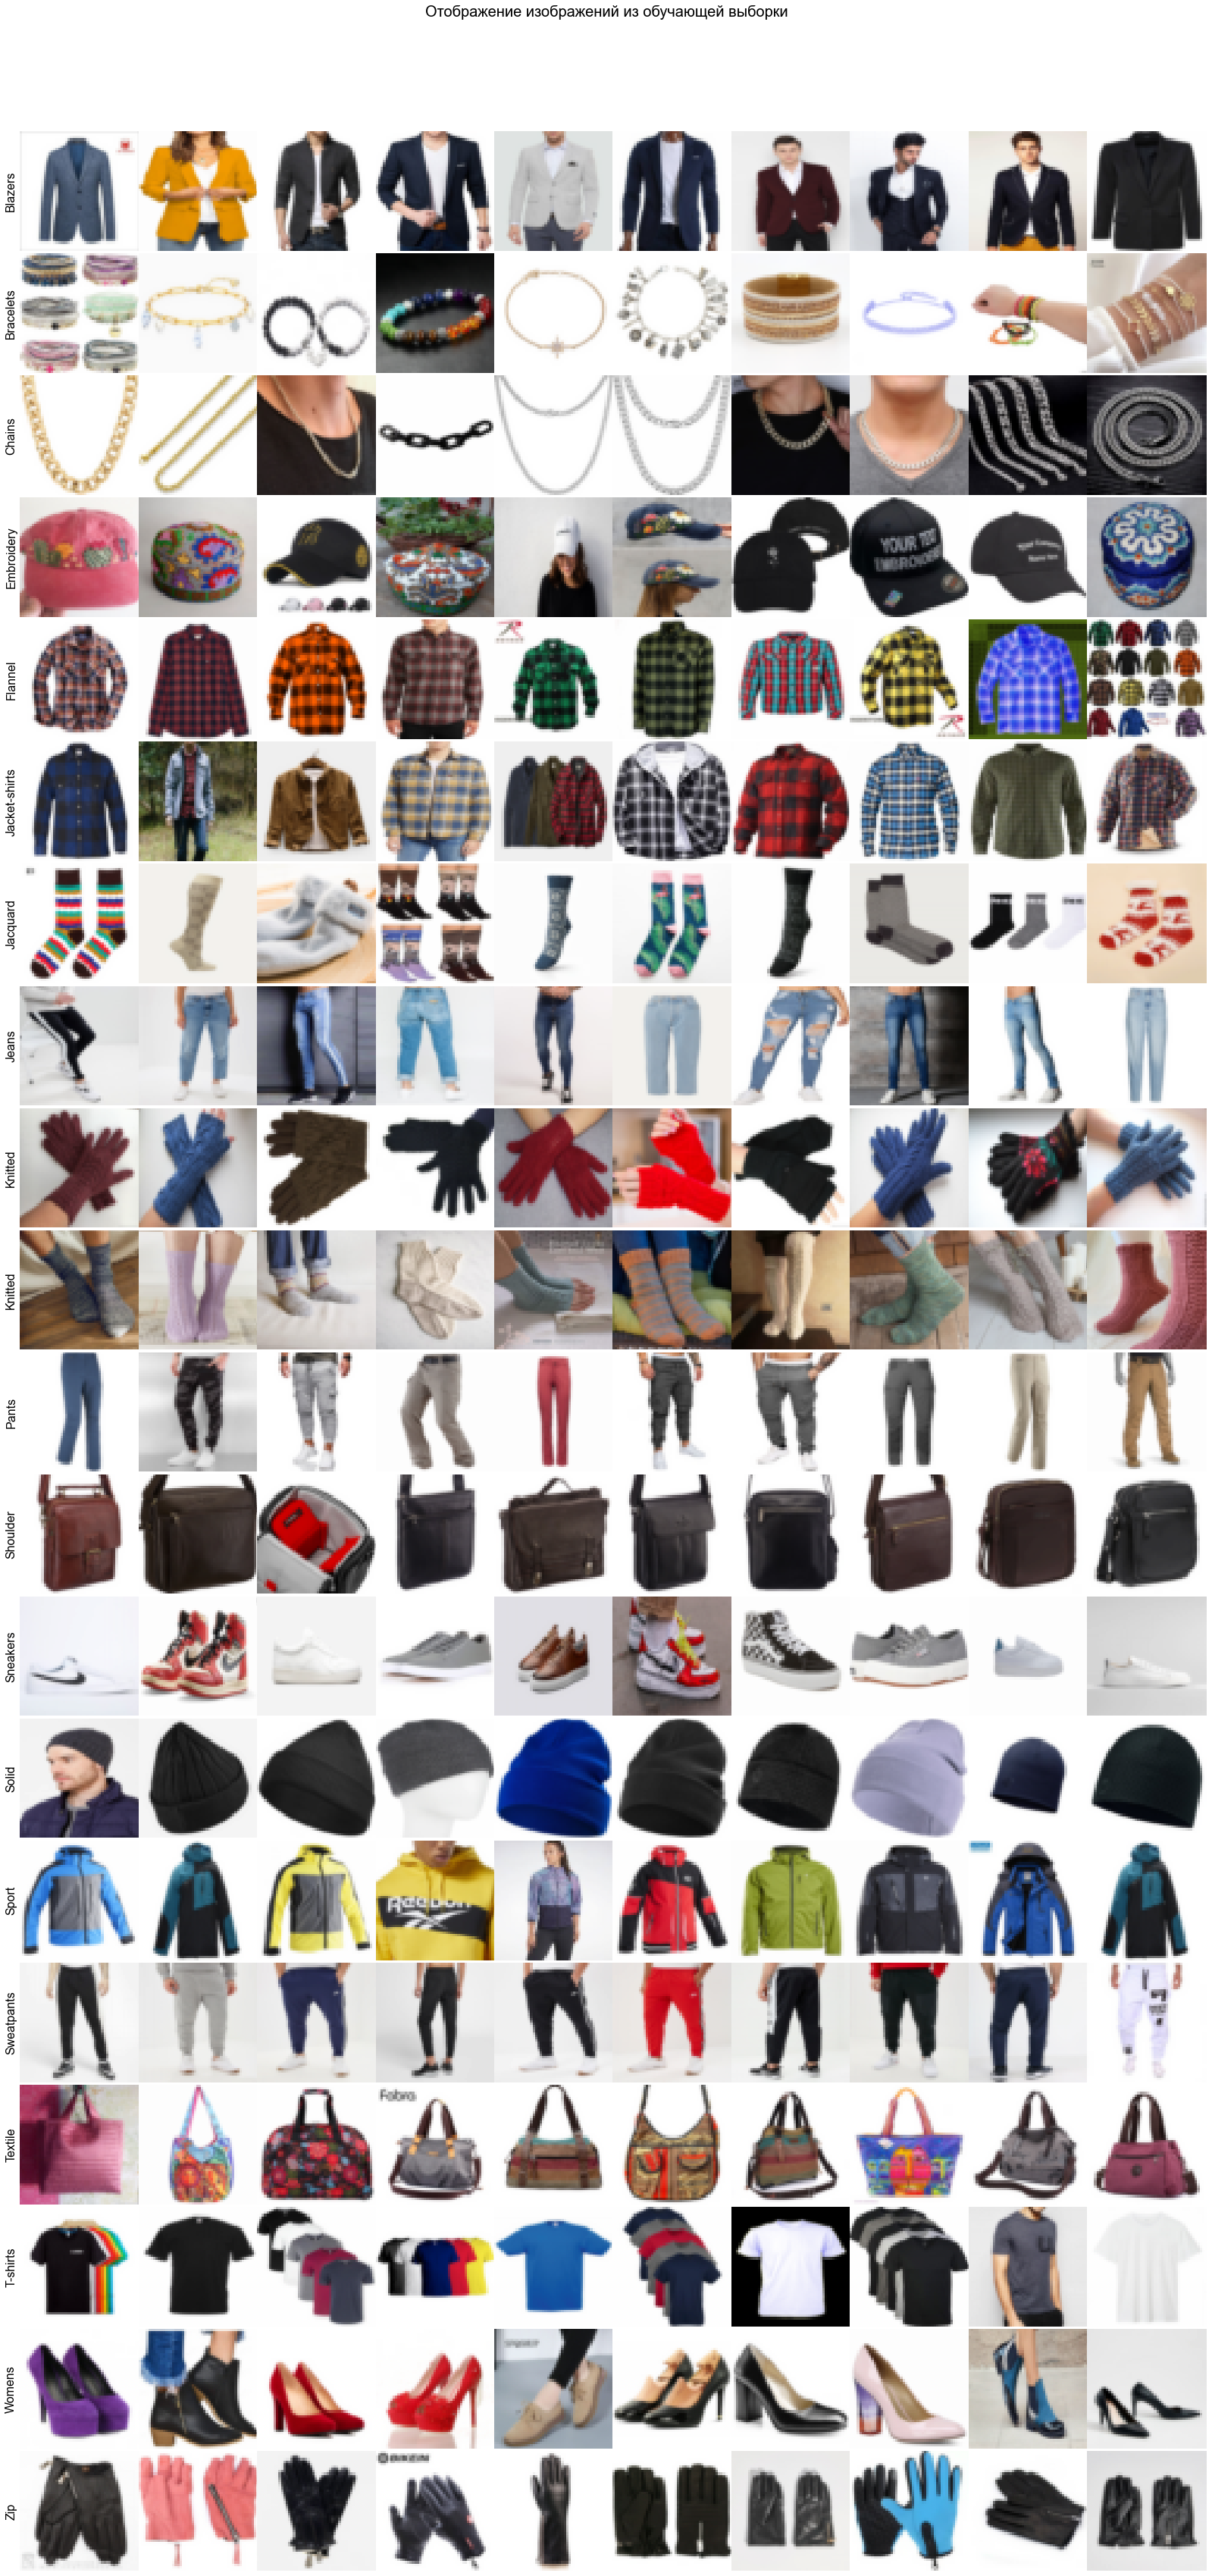

In [24]:
resize_img = (50, 50, 3) # Размер изображения

nrows = len(dict_dep.index) # Количество строк
ncols = 10 # Количество столбцов

samples = ncols # Количество примеров

fig = plt.gcf() # Создание фигуры
fig.set_size_inches(ncols * 2.2, nrows * 2.25) # Установка размера фигуры в дюймах

mpl.rcParams['axes.linewidth'] = 0 # Толщина рамки

idx_show = [] # Метки которые уже были показаны

i = 0 # Счетчик

for curr in dict_dep.index.tolist():
    # Случайная выборка
    idx_show = data.where(data.variable == curr).dropna().sample(n = samples)
    
    for var, val in zip(idx_show.variable, idx_show.value):        
        sp = plt.subplot(nrows, ncols, i + 1)
        
        # Скрытие осей
        plt.setp(sp.get_xticklabels(), visible = False)
        plt.setp(sp.get_yticklabels(), visible = False)
        plt.xticks([])
        plt.yticks([])

        path_to_img = os.path.join(base_dir, curr, val)

        img = mpimg.imread(path_to_img)

        # Уменьшение изображения
        img_small = transform.resize(img, resize_img)

        plt.imshow(img_small)
        
        if i % samples == 0:
            label = var.split('_') # Метка
            
            sp.set_ylabel(
                label[0],
                fontsize = 16, # Размер метки
                fontdict = {
                    'color': '#000000' # Цвет метки
                },
                labelpad = 4 # Отступ
            )
        
        i += 1

plt.suptitle(
    'Отображение изображений из обучающей выборки', # Заголовок
    fontsize = 20, # Размер заголовка
    fontdict = {
        'color': '#000000' # Цвет заголовка
    },
    y = 1.045 # Отступ заголовка от вершины осей
)

plt.tight_layout(pad = 0) # Установка расстояния между осями

plt.show() # Отображение фигуры